In [1]:
import process as pc
from IPython.core.interactiveshell import InteractiveShell

from sklearn.svm import LinearSVC
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_float
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import joblib
import cv2

from sklearn.decomposition import PCA
import numpy as np

InteractiveShell.ast_node_interactivity = "all"
%config Completer.use_jedi = False

In [2]:
positive_images_path = pc.DATA_PATH+"/img_align_celeba"
negative_images_path = pc.DATA_PATH+"/caltech-101/101_ObjectCategories"

pc.extract_dataset(positive_images_path)
bad_imgs_path_list = pc.extract_dataset(negative_images_path, folder="multi_folders")

Dataset already extracted


In [3]:
n_good_images = 50000
n_bad_images_folder=250
size_w = size_h = 96

img_list = pc.load_images(positive_images_path, number_of_images=n_good_images, random_seed=7) 
img_tmp = pc.load_image(positive_images_path)
img_tmp = img_as_float(cv2.imread(img_tmp))
images = np.empty((n_good_images, size_w, size_h), dtype=np.uint8)

for i, img in enumerate(img_list):
    images[i, ...] = pc.process_image(pc.DATA_PATH+"/img_align_celeba/"+img, resize=True, img_resize=(size_w, size_h))

Loaded image:  ../data/img_align_celeba/137546.jpg


In [4]:
bad_img_list = []
for fld in bad_imgs_path_list:
    tmp_img_list = pc.load_images(negative_images_path+"/"+fld, number_of_images=n_bad_images_folder, random_seed=7)
    bad_img_list += [negative_images_path+"/"+fld+'/'+img for img in tmp_img_list]


bad_images = np.empty((len(bad_img_list), size_w, size_h), dtype=np.uint8)
for i, img in enumerate(bad_img_list):
    bad_images[i, ...] = pc.process_image(img, resize=True, img_resize=(size_w, size_h))

/home/enrico/Machine_learning/face_detection_project/src/user_warnings.py:4: UserWarning: The requested number of images is greater than the number of images in the folder
  warnings.warn("The requested number of images is greater than the number of images in the folder", UserWarning)


(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

(-0.5, 95.5, 95.5, -0.5)

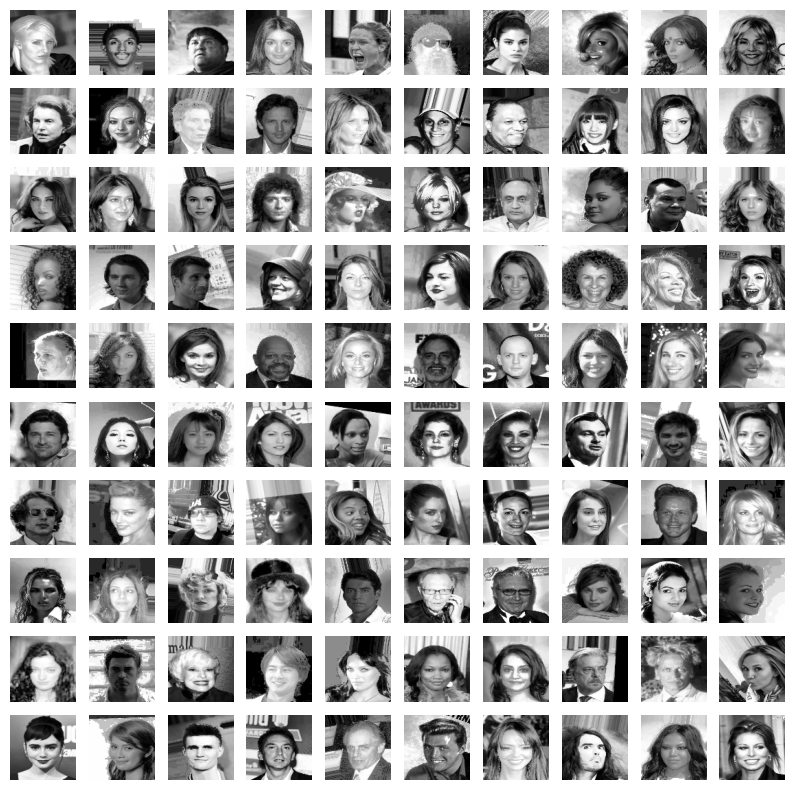

In [5]:
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(images[i*10+j], cmap='gray')
        ax[i, j].axis('off')

In [6]:
len(images)
len(bad_images)

50000

7459

In [10]:
positive_samples = []
for img in images:
    _, features = pc.extract_ORB_features(img)
    if features is not None:
        features_flattened = features.reshape(-1, features.shape[-1])
        positive_samples.extend(features_flattened)

negative_samples = []
for img in bad_images:
    _, features = pc.extract_ORB_features(img)
    if features is not None:
        features_flattened = features.reshape(-1, features.shape[-1])
        negative_samples.extend(features_flattened)

negative_samples[:2]
positive_samples[:2]

[array([ 29,  85, 125,  99, 182,  79, 239, 184, 125, 232, 127, 102, 219,
         93, 153, 112, 126, 148,  94, 126, 233, 176, 125,  78, 238, 239,
         39, 196, 111, 187,  64, 113], dtype=uint8),
 array([207, 183, 122, 197, 240, 114, 187, 176,  57, 248,  95, 245, 220,
        126, 206, 103, 246, 125, 182, 102, 165, 210, 172, 204, 110, 121,
         43, 134,  14, 231,  45, 245], dtype=uint8)]

[array([209,  76, 159, 253, 156,  14,  77, 175, 244, 162, 194,  16, 243,
        179,  49,  99,  65, 230, 120,  40, 104, 221, 193,  14, 233, 170,
        231,  20,  32, 240,  96,  40], dtype=uint8),
 array([247, 237, 253, 230, 172, 111,  79, 255, 251, 246, 186,  24, 115,
        253,  93,  51, 157, 198, 125, 111, 248,  99, 251,  43, 249, 254,
         69,  60, 224, 251, 214,  96], dtype=uint8)]

In [11]:
for i in range(len(negative_samples)):
    if len(negative_samples[i]) != 32:
        print(len(negative_samples[i]))
for i in range(len(positive_samples)):
    if len(positive_samples[i]) != 32:
        print(i, len(positive_samples[i]))

positive_samples = [sample for sample in positive_samples if len(sample) == 32]



In [13]:
negative_labels = np.zeros(len(negative_samples))
positive_labels = np.ones(len(positive_samples))
X = np.vstack((negative_samples, positive_samples))
y = np.concatenate((negative_labels, positive_labels), axis=0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
X_train.shape
y_train.shape

X_train[0]

(2181712, 32)

(2181712,)

array([169,  92, 101,  93,  68,  86, 239, 190,  81, 226, 116,  66, 115,
        61, 149,  39,  92, 228,  54, 238, 233, 246, 117, 175, 103,  42,
       229,   0, 127, 248,  80, 252], dtype=uint8)

PCA(n_components=32, random_state=7, whiten=True)

(0.0, 1.02)

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Explained variance')

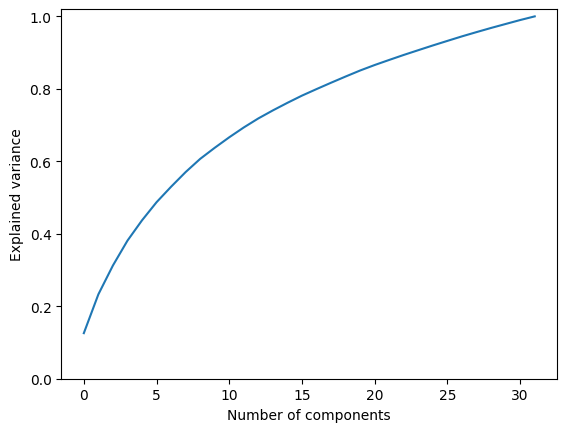

array([0.12572799, 0.23282422, 0.31245467, 0.38107735, 0.4370978 ,
       0.48711204, 0.52986135, 0.57034172, 0.60674903, 0.63733653,
       0.6663594 , 0.69351905, 0.71842012, 0.74056308, 0.76144858,
       0.78133102, 0.79933829, 0.81691672, 0.83403164, 0.85068006,
       0.8658014 , 0.87984959, 0.89363405, 0.9067724 , 0.91980669,
       0.93239187, 0.94484855, 0.95659857, 0.96806382, 0.97899747,
       0.98989423, 1.        ])

In [17]:
pca = PCA(n_components=32, whiten=True, random_state=7)
pca.fit(X_train)
var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var)
plt.ylim(0, 1.02)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
var


In [18]:
idx = [i for i in range(len(var)) if var[i] > 0.95]
idx

[27, 28, 29, 30, 31]

In [22]:
if 0:
    pca = PCA(n_components=idx[-1], whiten=True, random_state=7)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_train_pca.shape
    y_train.shape
    print("PCA done")
else:
    X_train_pca = X_train
    X_test_pca = X_test

In [23]:
param_grid = { 'C' : [np.power(10., i) for i in range(-2, 2)],
               'max_iter' : [7500],
               'random_state' : [7] }

grid_searh = GridSearchCV(LinearSVC(), param_grid, cv=5, n_jobs=-1)
grid_searh.fit(X_train_pca, y_train)
grid_searh.best_params_

/home/enrico/Machine_learning/face_detection_project/prj_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/enrico/Machine_learning/face_detection_project/prj_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/enrico/Machine_learning/face_detection_project/prj_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/enrico/Machine_learning/face_detection_project/prj_env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of 

KeyboardInterrupt: 

In [ ]:
best_svc = grid_searh.best_estimator_

best_svc.score(X_train_pca, y_train)

best_svc.score(X_test_pca, y_test)

0.8591436214384925

0.8579816864353219

In [ ]:
y_pred = best_svc.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy test:", accuracy)


y_pred = best_svc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy)

Accuracy test: 0.8591436214384925
Accuracy test: 0.8579816864353219


In [ ]:
pipeline_save_path = pc.DATA_PATH+"/svm_model_3.pkl"

from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[
        ('preprocess', pc.process_image),
        ('extract_features', pc.extract_ORB_features),
        ('pca', pca),
        ('svc', best_svc)  
    ])

joblib.dump(
    pipeline, pipeline_save_path
    )

['../data/svm_model_definitive.pkl']

In [ ]:
pipeline_save_path = pc.DATA_PATH+"/svm_model_definitive.pkl"
image_path = pc.DATA_PATH+"/final/Valentino_Rossi_2017.jpg"

pipeline = joblib.load(pipeline_save_path)

image = mpimg.imread(image_path)

pc.detect_faces(image_path, pipeline, threshold=0.75, window_size=(128, 128), step_size=(16,16))


[[  0.   0.   0. ...  11.   2.  14.]
 [ 18.  12.   2. ...   0.   0.   0.]
 [ 17.   0.   0. ...  12.   3.  33.]
 ...
 [ 28.   9.   0. ...  12.   4.   8.]
 [  2.   0.   0. ...  70. 121.   8.]
 [ 27.  36.   1. ...   1.   7.   5.]]
[0.49291062 0.51763225 0.47305508 0.43547301 0.82657878 0.68626942
 0.62843086 0.58902376 0.43559005 0.63128511 0.71979421 0.79621821
 0.52832871 0.71324786 0.78544971 0.80966587 0.71331684 0.7614095
 0.56947709 0.53163623 0.47435025 0.71293192 0.69056728 0.4704391
 0.59003428 0.58674009 0.49114216 0.75390662 0.59260126 0.57975205
 0.62292835 0.55130654 0.6946436  0.48465154 0.60625374 0.60950128
 0.67415999 0.64909694 0.69179151 0.64057866 0.54976117 0.49256819
 0.64263305 0.59733312 0.56994661 0.79972187 0.74073748 0.78817865
 0.63036703 0.59263738 0.72209251 0.56001954 0.82171368 0.6315613
 0.58533098 0.8119286 ]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1]


QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the object's thread (0x2d6b610).
Cannot move to target thread (0x1a775160)

QObject::moveToThread: Current thread (0x1a775160) is not the 

KeyboardInterrupt: 

: 